# Credit Card Fraud Detector




In [ ]:
import pandas as pd
import numpy as np    
import os
from ctypes import cdll

import seaborn as sns
import matplotlib.pyplot as plt 

# `1. Load the Dataset`




In [ ]:
#pd.set_option('display.max_columns', None)
data = pd.read_json('/content/drive/MyDrive/capital1/transactions/transactions.txt', lines='True')

## Exploratory Data analysis

In [ ]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [ ]:
data.shape

(786363, 29)

Check the outlier values i.e. The minimum and the maximum values

In [ ]:
data.max()

accountNumber                         999389635
customerId                            999389635
creditLimit                               50000
availableMoney                            50000
transactionDateTime         2016-12-30T23:59:45
transactionAmount                       2011.54
merchantName                 williamssonoma.com
acqCountry                                   US
merchantCountryCode                          US
posEntryMode                                 90
posConditionCode                             99
merchantCategoryCode              subscriptions
currentExpDate                          12/2032
accountOpenDate                      2015-12-31
dateOfLastAddressChange              2016-12-30
cardCVV                                     998
enteredCVV                                  998
cardLast4Digits                            9998
transactionType                        REVERSAL
echoBuffer                                     
currentBalance                          

In [ ]:
data.min()

accountNumber                         100088067
customerId                            100088067
creditLimit                                 250
availableMoney                         -1005.63
transactionDateTime         2016-01-01T00:01:02
transactionAmount                             0
merchantName                            1st BBQ
acqCountry                                     
merchantCountryCode                            
posEntryMode                                   
posConditionCode                               
merchantCategoryCode                    airline
currentExpDate                          01/2020
accountOpenDate                      1989-08-22
dateOfLastAddressChange              1989-08-22
cardCVV                                     100
enteredCVV                                    0
cardLast4Digits                               0
transactionType                                
echoBuffer                                     
currentBalance                          

In [ ]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


### **The initial exploratory data analysis**
1.   Total Records- **786,363**
2.   Fields in each record - **29 Columns**
3.   DataTypes- **Integers, Floats, Object, Boolean**
4.   Transaction Amount Range- **0.00 (Min) to 2011.54 (Max)**
5.   Credit Limit Range-  **250 (Min) to 50,000 (Max)**
6.   Mean transaction Amount- **136.98**
7.   Mean credit limit - **10759.46**


In [ ]:
data.isnull().sum()
data=data.dropna()

In [ ]:
data = data.reset_index(drop=True)
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False


**Remove insignificant Columns**



In [ ]:
data.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1, inplace=True)

Remove Transactions with 0 transaction amount.

In [ ]:
data=data[data['transactionAmount']!=0]
data = data.reset_index(drop=True)
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764133,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
764134,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
764135,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
764136,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


There are **22,225** rows with Transaction Amount as 0.0

### Correlation Matrix
Determine important features using correlation matrix, see how they correlerate with the creditLimit and transaction Amount

Multicollinearity among predictors

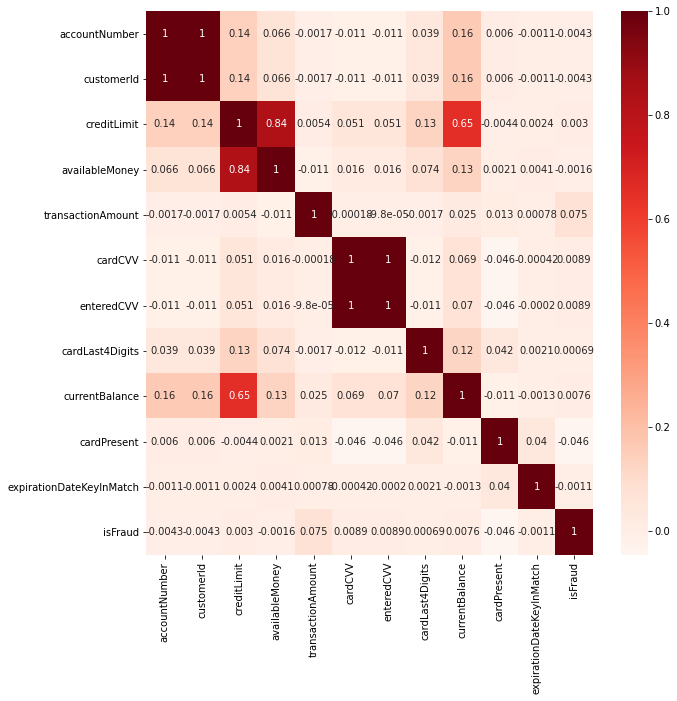

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

### Dimensionality Reduction
Here the variable pairs **(accountNo, customerId), (cardCVV, enteredCVV)** and **(availableBalance, creditLimit)** are highly co-related.
Hence in future if the independent features need to be reduced, either one of these variables could simply be droppped.

In [ ]:
data.drop(['enteredCVV'],axis=1, inplace=True)

# 2. Plot - Data Visualization

In [ ]:
TA=data['transactionAmount']
#data['transactionAmount'][0]

In [ ]:
data.isFraud.value_counts()

False    751843
True      12295
Name: isFraud, dtype: int64

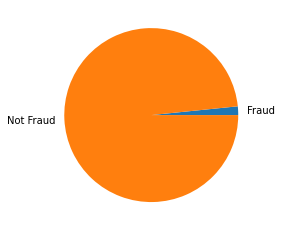

In [ ]:
dataP = [12295,751843] 

fig = plt.figure(figsize =(8, 4)) 
plt.pie(dataP, labels =['Fraud', 'Not Fraud']  ) 
  
plt.show() 

Transaction Amount Distribution


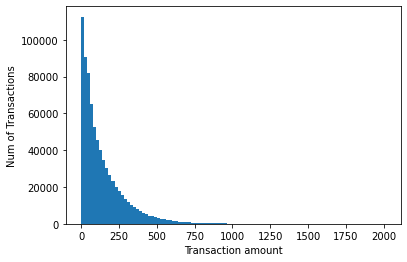

In [ ]:
plt.xlabel('Transaction amount')
plt.ylabel('Num of Transactions')
plt.hist(TA, bins=100)[0]
print("Transaction Amount Distribution")

Plot Transaction Amount in bins of 100

Based upon the above plot, the parameter Transaction Amount shows exponential curve.
Hence the Transaction Amount varies exponentially in the dataset

The number of transactions peaks in the Transaction Amount range from 0 to 100 USD 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Credit Limit Density Distribution


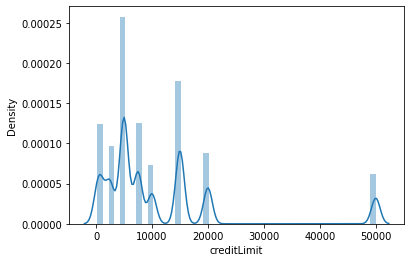

In [ ]:
sns.distplot(data['creditLimit'])
print("Credit Limit Density Distribution")

However the plot of Credit Limit indicates that credit Limit is set at discrete values and not uniformly evenly distributed as the Available Money

Credit Limit peaks at about **5000**. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Data Distribution')

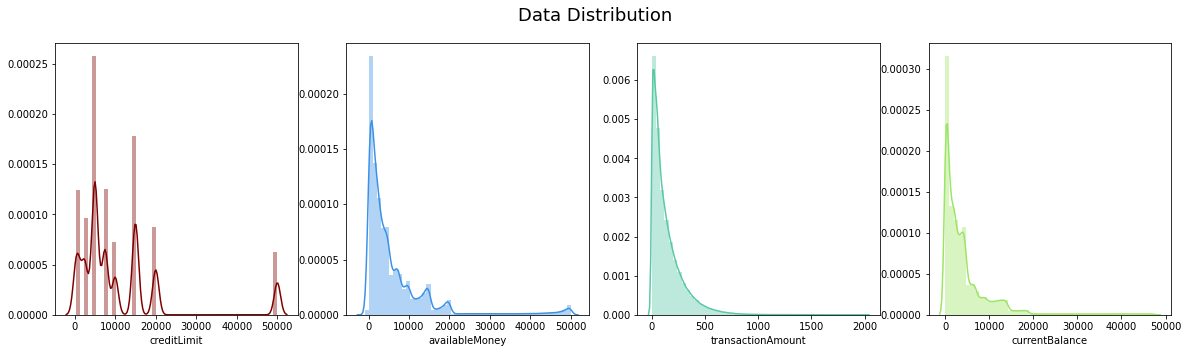

In [ ]:
#sns.distplot(data['transactionAmount'])

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

n_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
colors = ['#800000','#3C91E6','#59C9A5','#9BE564']
counter = 0

for j in range(4):
    sns.distplot(data[n_cols[counter]], ax=ax[j], color=colors[j])
    ax[j].set_xlabel(n_cols[counter], fontsize=10)
    ax[j].set_ylabel('')
    counter+=1

fig.suptitle('Data Distribution', fontsize=18)

Here the distribution plots of Available Money, Transaction Amount, Current Balance follow exponential curve.

Text(0.5, 1.0, 'Card Present and Fraudulent Transactions')

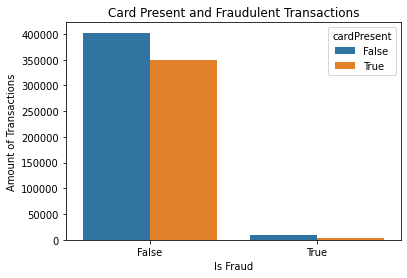

In [ ]:
sns.countplot(data=data, x='isFraud', hue='cardPresent')
plt.xlabel('Is Fraud')
plt.ylabel('Amount of Transactions')
plt.title('Card Present and Fraudulent Transactions')

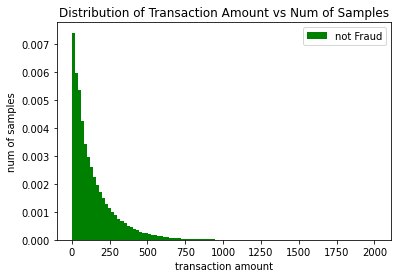

In [ ]:
plt.hist(data[data.isFraud==False].transactionAmount,bins=100,label='not Fraud',density=True, color='green')
plt.title("Distribution of Transaction Amount vs Num of Samples")
plt.ylabel("num of samples")
plt.xlabel("transaction amount")
plt.legend()
plt.show()  

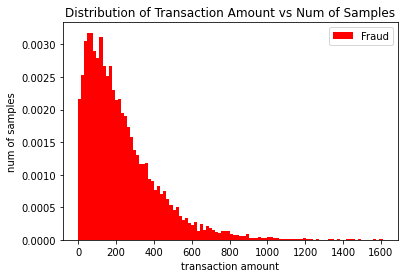

In [ ]:
plt.hist(data[data.isFraud==True].transactionAmount,bins=100,label='Fraud',density=True, color='red')
plt.title("Distribution of Transaction Amount vs Num of Samples")
plt.ylabel("num of samples")
plt.xlabel("transaction amount")
plt.legend()
plt.show()

In [ ]:
data['merchantName'].value_counts()

Uber                        24860
Lyft                        24810
staples.com                 16516
oldnavy.com                 16483
alibaba.com                 16426
                            ...  
Golds Gym #956354               2
Boost Mobile #104815            2
EZ Wireless #149871             1
Curves #849125                  1
TMobile Wireless #602341        1
Name: merchantName, Length: 2490, dtype: int64

There are in all **2490** unique Merchants present in the entire dataset

Top 5 Merchants with **highest no of Fraudulent transactions** are as follows:(Refer chart below)


1.   **Lyft**
2.   **Ebay.com**
3.   **Fresh Flowers**
4.   **Uber.com**
5.   **Walmart.com**


Text(0, 0.5, 'Account Number')

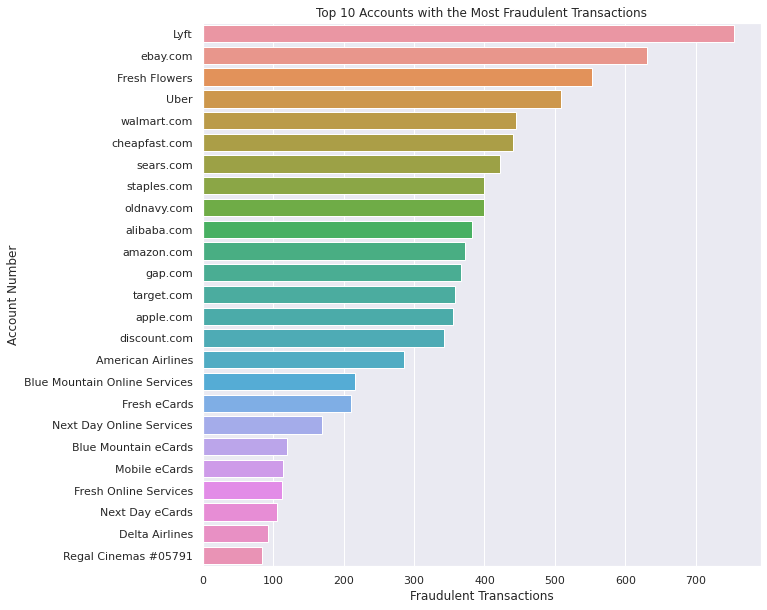

In [ ]:
clients = data[data['isFraud'] == True]
sns.set(rc={'figure.figsize':(10,10)})

top25= clients['merchantName'].value_counts().head(25)
sns.barplot(y=list(range(25)), x=top25.values, orient='h')

plt.title('Top 10 Accounts with the Most Fraudulent Transactions')
plt.xlabel('Fraudulent Transactions')
plt.yticks(ticks=list(range(25)), labels=top25.index.tolist())
plt.ylabel('Account Number')


Text(0, 0.5, 'Account Number')

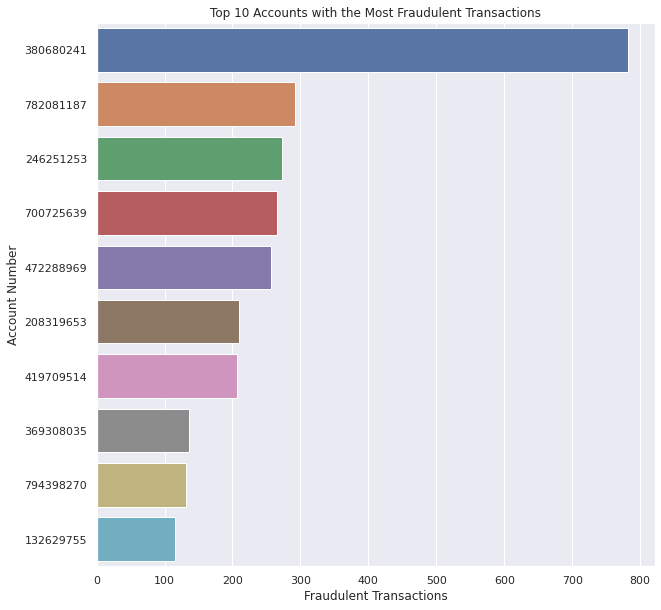

In [ ]:
fraudTrans = data[data['isFraud'] == True]

top10= fraudTrans['accountNumber'].value_counts().head(10)
sns.barplot(y=list(range(10)), x=top10.values, orient='h')

plt.title('Top 10 Accounts with the Most Fraudulent Transactions')
plt.xlabel('Fraudulent Transactions')
plt.yticks(ticks=list(range(10)), labels=top10.index.tolist())
plt.ylabel('Account Number')


Account No **380680241** has the highest no of fraud transactions 

# 3. Data Wrangling - Duplicate Transactions


In [ ]:
data['transactionType'].value_counts()

PURCHASE    743709
REVERSAL     19731
               698
Name: transactionType, dtype: int64

In [ ]:
data['isFraud'].value_counts()

False    751843
True      12295
Name: isFraud, dtype: int64

In [ ]:
revTrans=data[data['transactionType']=='REVERSAL']
total=revTrans['transactionAmount'].sum()
total

2821792.4999999995

In [ ]:
FTrans=data[data['isFraud']==True]
total2=FTrans['transactionAmount'].sum()
total2

2796505.8899999997

## Reversed and Fraudulent Transaction Estimates
1.   Number of reversed transactions: **19,731 transactions**
2.   Total dollar estimate for reversed transactions:   **2,821,792.5 USD**
3.   Number of Fraudulent transactions: **12,295 transactions**
4.   Total dollar estimate lost in Fraudulent transactions:   **2,796,505.89 USD**

These transactions sums are considering only the transactions left after the initial cleaning of the dataset

##Multiswipe Transactions
Multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.
For simplification the any repeated transactions within the time period of 60 mins is assumed to be a multiswipe transaction

Total dollar Estimate for Multi Swipe transactions- **1304157.0 USD**


The **approach for finding the multiswipe transactions** are as follows:

1.   First convert all the transactionDateTime to its corresponding dateTime for easier calculation.
2.   Then group the transactions by Account Number, Merchant Id and Transaction Amount and then sort them in descending order of DateTime (latest is first)
3.   The compute the time difference between each of the subsequent requests (in seconds)
4.   Then flag all the transactions that have a time gap of less than an hour (3600 secs)
5.   Filter all the multiswipe requests and then compute the sum of all the transactionAmount



### Interesting deduction
It is noticed that most of the Reversal transactions are followed after Multiswipe or Fraudulent transactions made between a given pair of CustomerId and merchant


In [ ]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'], infer_datetime_format=True)
data['transactionDateTime']

0        2016-08-13 14:27:32
1        2016-10-11 05:05:54
2        2016-11-08 09:18:39
3        2016-12-10 02:14:50
4        2016-03-24 21:04:46
                 ...        
764133   2016-12-22 18:44:12
764134   2016-12-25 16:20:34
764135   2016-12-27 15:46:24
764136   2016-12-29 00:30:55
764137   2016-12-30 20:10:29
Name: transactionDateTime, Length: 764138, dtype: datetime64[ns]

In [ ]:
# duplicated = data[data.duplicated(['accountNumber', 'customerId', 'transactionAmount', 'merchantName', 'transactionType'], keep=False)]

In [ ]:
# purchase = duplicated[duplicated.transactionType == 'PURCHASE']
# purchase.sort_values(['accountNumber', 'customerId', 'merchantName', 'transactionDateTime'])
# purchase.head()

In [ ]:
data2=data
data2.sort_values(['accountNumber','merchantName','transactionDateTime'])
data2

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764133,732852505,732852505,50000,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,3783,PURCHASE,1095.04,False,False,False
764134,732852505,732852505,50000,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,3388,PURCHASE,1214.96,False,False,False
764135,732852505,732852505,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,3783,PURCHASE,1233.85,False,False,False
764136,732852505,732852505,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,3388,PURCHASE,1283.28,False,False,False


In [ ]:
data2['time_span'] = data2['transactionDateTime'].diff(2).dt.total_seconds()/3600
multi_purchase = data2.groupby(['accountNumber', 'merchantName', 'transactionAmount'])
multi_purchase.head()


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,time_span
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,1803,PURCHASE,0.00,False,False,False,NaN
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,767,PURCHASE,0.00,True,False,False,NaN
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,767,PURCHASE,0.00,False,False,False,2082.851944
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,767,PURCHASE,0.00,False,False,False,1437.148889
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,3143,PURCHASE,0.00,True,False,False,-5484.231389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764133,732852505,732852505,50000,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,3783,PURCHASE,1095.04,False,False,False,87.305278
764134,732852505,732852505,50000,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,3388,PURCHASE,1214.96,False,False,False,80.886389
764135,732852505,732852505,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,3783,PURCHASE,1233.85,False,False,False,117.036667
764136,732852505,732852505,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,3388,PURCHASE,1283.28,False,False,False,80.172500


In [ ]:
# def span(df):
#     df['time_span'] = df["transactionDateTime"].diff(1).dt.total_seconds() / 3600
#     return df 
# mp = data2[data2.groupby(['accountNumber', 'merchantName', 'transactionAmount'])['time_span'].transform('count') < 1]
# mp

In [ ]:
# mp = data2[data2.groupby(['accountNumber', 'merchantName', 'transactionAmount'])['time_span'].filter(lambda x:x<0)]

# multi_swipe = multi_purchase[multi_purchase.time_span < 1]
# multi_swipe.head()


In [ ]:
multi_purchase = data.groupby(['accountNumber', 'merchantName', 'transactionAmount'])
multi_purchase['time_span'].head()

0                 NaN
1                 NaN
2         2082.851944
3         1437.148889
4        -5484.231389
             ...     
764133      87.305278
764134      80.886389
764135     117.036667
764136      80.172500
764137      76.401389
Name: time_span, Length: 744369, dtype: float64

In [ ]:
#data2 = data.drop(['transactionDateTime'],axis=1)

In [ ]:
multi_swipe=data2[data.time_span<0]
multi_swipe['transactionAmount']

4          71.18
5          30.76
15         30.08
16         41.25
89         81.66
           ...  
763857    154.14
763897    201.79
763898    201.79
764030     14.01
764031     58.41
Name: transactionAmount, Length: 9958, dtype: float64

In [ ]:
ms_total=multi_swipe['transactionAmount'].sum()
ms_total

1336805.89

## 4. Model  - Fraud Prediction

In [ ]:
Y = data['isFraud']
X = data[['creditLimit','availableMoney','transactionAmount','posEntryMode','posConditionCode','merchantCategoryCode','currentBalance','transactionType']]

In [ ]:
X

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,currentBalance,transactionType
0,5000,5000.00,98.55,02,01,rideshare,0.00,PURCHASE
1,5000,5000.00,74.51,09,01,entertainment,0.00,PURCHASE
2,5000,5000.00,7.47,09,01,mobileapps,0.00,PURCHASE
3,5000,5000.00,7.47,09,01,mobileapps,0.00,PURCHASE
4,5000,5000.00,71.18,02,01,fastfood,0.00,PURCHASE
...,...,...,...,...,...,...,...,...
764133,50000,48904.96,119.92,90,01,rideshare,1095.04,PURCHASE
764134,50000,48785.04,18.89,09,01,online_subscriptions,1214.96,PURCHASE
764135,50000,48766.15,49.43,02,01,rideshare,1233.85,PURCHASE
764136,50000,48716.72,49.89,09,99,online_retail,1283.28,PURCHASE


In [ ]:
data.posEntryMode.value_counts()

05    306224
09    229911
02    190266
90     18926
80     14852
        3959
Name: posEntryMode, dtype: int64

In [ ]:
data.merchantCategoryCode.value_counts()

online_retail           196368
fastfood                108995
entertainment            77845
food                     73313
online_gifts             64332
rideshare                49670
hotels                   33159
fuel                     23240
subscriptions            22224
auto                     21020
health                   18527
personal care            18408
airline                  14962
mobileapps               14592
online_subscriptions     10839
furniture                 7220
food_delivery             5984
gym                       2096
cable/phone               1344
Name: merchantCategoryCode, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')
# # passing bridge-types-cat column (label encoded values of bridge_types)
# enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Cat']]).toarray())
# # merge with main df bridge_df on key values
# X = X+enc_df

In [ ]:
# mcc=data['merchantCategoryCode']

# total_set = X
# #total_set = total_set.append(yp, ignore_index=True)

# le1=LabelEncoder()
# X['merchantCategoryCode'] = le1.fit(X['merchantCategoryCode'])
# Xn = le1.transform(X['merchantCategoryCode'])

### One-Hot encoding for the multi categorical variables

In [ ]:
def preprocessing_step(X):

    X = X.drop(columns = ['merchantCategoryCode'])

    T=np.zeros(len(X))

    # Tz = np.zeros(len(X))
    # T = pd.DataFrame({'Column1': Tz})
    
    X['PEM0']= X['PEM1'] = X['PEM2'] = X['PEM3'] = X['PEM4'] = T
    X['PCC0']= X['PCC1'] = X['PCC2'] = T
    X['TT0'] = X['TT1'] = T



    # Manually one-hot encode PosEntryMode
    # posEntryMode = 9  : PEM0
    # posEntryMode = 5  : PEM1
    # posEntryMode = 5  : PEM2
    # posEntryMode = 90 : PEM3
    # posEntryMode = 80 : PEM4

    for i in range(len(X)):
        if X['posEntryMode'][i] == '09':
            X['PEM0'][i] = 1
        if X['posEntryMode'][i] == '05':
            X['PEM1'][i] = 1
        if X['posEntryMode'][i] == '02':
            X['PEM2'][i] = 1
        if X['posEntryMode'][i] == '90':
            X['PEM3'][i] = 1
        if X['posEntryMode'][i] == '80':
            X['PEM4'][i] = 1
    


    # Manually one-hot encode PosConditionCode as following:
    # posConditionCode = 1  : PCC0
    # posConditionCode = 8  : PCC1
    # posConditionCode = 99 : PCC2

    for i in range(len(X)):
        if X['posConditionCode'][i] == '01':
            X['PCC0'][i] == 1
        if X['posConditionCode'][i] == '08':
            X['PCC1'][i] == 1
        if X['posConditionCode'][i] == '99':
            X['PCC2'][i] == 1
    


    # One-hot encode transactionType
    # transactionType = Purchase  : TT0
    # transactionType = Revarsal  : TT1

    for i in range(len(X)):
        if X['transactionType'][i] == 'PURCHASE':
            X['TT0'][i] = 1
    for i in range(len(X)):
        if X['transactionType'][i] == 'REVERSAL':
            X['TT1'][i] = 1

      
    # Remove the One-Hot encoded columns   
    X = X.drop(columns = ['posEntryMode','posConditionCode','transactionType']) 

    return X

In [ ]:
X=preprocessing_step(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
X

,creditLimit,availableMoney,transactionAmount,currentBalance,PEM0,PEM1,PEM2,PEM3,PEM4,PCC0,PCC1,PCC2,TT0,TT1
0,5000,5000.00,98.55,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5000,5000.00,74.51,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,5000.00,7.47,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5000,5000.00,7.47,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000,5000.00,71.18,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764133,50000,48904.96,119.92,1095.04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
764134,50000,48785.04,18.89,1214.96,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
764135,50000,48766.15,49.43,1233.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
764136,50000,48716.72,49.89,1283.28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Sampling the data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
X2, Y2 = RandomUnderSampler().fit_resample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Training Data and Test Data splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, Y2)

In [ ]:
xt = pd.DataFrame(x_train, columns = ['creditLimit','availableMoney','transactionAmount','currentBalance','PEM0','PEM1','PEM2','PEM3','PEM4','PCC0','PCC1','PCC2','TT0','TT1'])
xt

,creditLimit,availableMoney,transactionAmount,currentBalance,PEM0,PEM1,PEM2,PEM3,PEM4,PCC0,PCC1,PCC2,TT0,TT1
0,250.0,245.84,188.30,4.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50000.0,49852.76,273.18,147.24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,250.0,130.64,136.30,119.36,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7500.0,2856.07,153.23,4643.93,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20000.0,6213.70,11.94,13786.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18437,1000.0,572.53,526.71,427.47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18438,10000.0,9755.18,143.83,244.82,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18439,15000.0,7475.22,106.19,7524.78,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18440,15000.0,3632.20,26.85,11367.80,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


###4.0. Model Analysis Metrics and Estimations

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve 

In [ ]:
def confusion_mat(y_pred, y_true):
    plt.subplots(figsize=(4,4))
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {acc}')
    sns.heatmap(conf,cmap='Blues',cbar=False,annot=True,fmt='g',xticklabels=['False', 'True'],yticklabels=['False','True'],annot_kws={"size": 20})
    plt.show()


In [ ]:
def plot_roc(models):
    for key, value in models.items():
        fpr, tpr, _ = roc_curve(value[0], value[1])
        sns.lineplot(x=fpr, y=tpr, label=key)

    ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
    ax.lines[len(models)].set_linestyle("--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')

### 4.1.  Model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(random_state=0).fit(xt, y_train)
print('Logistic Regression accuracy (train)=',LR.score(xt, y_train))
print('Logistic Regression accuracy (test)=',LR.score(x_test, y_test))

Logistic Regression accuracy (train)= 0.6362108231211365
Logistic Regression accuracy (test)= 0.6434612882238127


In [ ]:
Xn = LR.predict(xt)
Xn
ytestpred=LR.predict(x_test)
ytestpred

array([False,  True,  True, ...,  True,  True,  True])

In [ ]:
yn=pd.DataFrame(y_train, columns = ['isFraud'])
yn

,isFraud
0,False
1,True
2,False
3,False
4,False
...,...
18437,True
18438,False
18439,True
18440,True


In [ ]:
# confusion_mat(y_train,Xn)
# print("  Confusion Matrix of Logistic Regression (Train Set)")

Accuracy: 0.6434612882238127


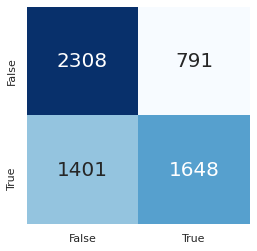

  Confusion Matrix of Logistic Regression (Test Set)


In [ ]:
confusion_mat(ytestpred,y_test)
print("  Confusion Matrix of Logistic Regression (Test Set)")

### 4.2.  Model- Decision Tree Classifier

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier-Train: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier- Test: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier-Train: 1.00
Accuracy of Decision Tree classifier- Test: 0.57


Accuracy: 0.5725439167208849


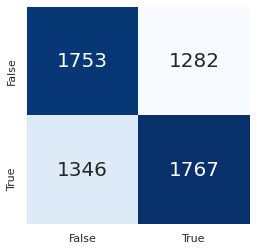

  Confusion Matrix of Decision Tree Classifier Test Set


In [ ]:
ytc=clf.predict(x_test)
confusion_mat(y_test,ytc)
print("  Confusion Matrix of Decision Tree Classifier Test Set")

### 4.3.  Model - Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:}'.format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:}'.format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set: 0.5598091313306582
Accuracy of SVM classifier on test set: 0.5657124268054652


Accuracy: 0.5657124268054652


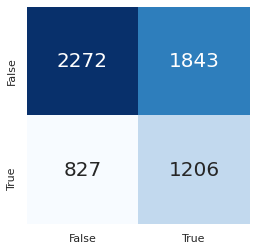

  Confusion Matrix of Support Vector Machine Test Set


In [ ]:
yvc=svm.predict(x_test)
confusion_mat(y_test,yvc)
print("  Confusion Matrix of Support Vector Machine Test Set")

### 4.4. Model - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
accuracy = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        RFC = RandomForestClassifier(max_depth=i+1, random_state=j)
        RFC.fit(x_train, y_train)
        accuracy[i,j] = RFC.score(x_train, y_train)+RFC.score(x_test, y_test)

The Random forest Classifier has an option to explicitly specify maxdepth and the random state.
Here we iterate through all the possible values to obtain the best fit RFmodel 

In [ ]:
np.argmax(accuracy)


90

In [ ]:
yn=RFC.predict(x_train)
yn 

array([ True,  True, False, ...,  True, False, False])

Accuracy: 0.6701366297983083


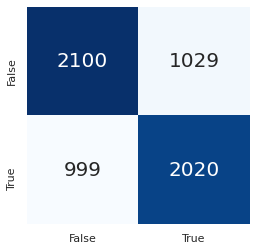

  Confusion Matrix of Random Forest Classifier Test Set


In [ ]:
ytestpred=RFC.predict(x_test)
ytestpred
confusion_mat(y_test,ytestpred)
print("  Confusion Matrix of Random Forest Classifier Test Set")

In [ ]:
# confusion_mat(y_train,yn)
# print("  Confusion Matrix of Random Forest Classifier")

### 4.5 Model - XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB = XGBClassifier().fit(x_train,y_train)  
print('accuracy(train)=',XGB.score(x_train, y_train))

accuracy(train)= 0.6697212883635181


In [ ]:
X1n = XGB.predict(x_train)

In [ ]:
# confusion_mat(y_train,X1n)
# print("  Confusion Matrix of XGBoost Classifier")

Accuracy: 0.6704619388418998


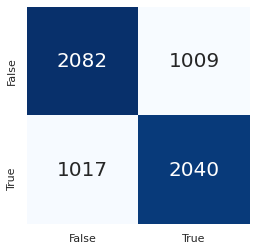

  Confusion Matrix of XGBoost Classifier Test Set


In [ ]:
ypred = XGB.predict(x_test)
ypred
confusion_mat(y_test,ypred)
print("  Confusion Matrix of XGBoost Classifier Test Set")

My thought behind using XGBoost was the fact that XGBoost performs sequential bagging on incorrect data which is very relevant incase of the given dataset.
In XGBoost, we fit a model on the gradient of loss generated from the previous step. Hence it is a good model when it comes to a varied unbalanced dataset.


### 4.6. Model Analysis

In [ ]:
from sklearn import metrics

def plot_roc(actuals, predicted_dict):

    plt.title('ROC')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    for key, predicted in predicted_dict.items():
        fpr, tpr, threshold = metrics.roc_curve(actuals, predicted)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = '%25s AUC = %0.3f' % (key, roc_auc))
    plt.legend(loc = 'lower right')
    plt.show()

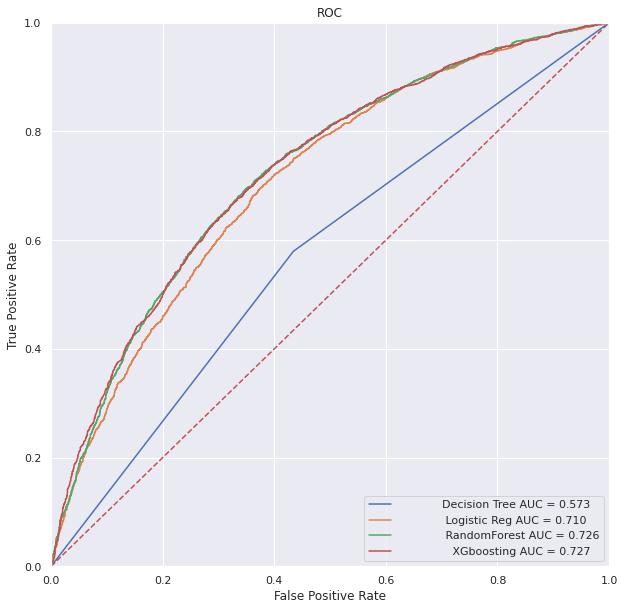

In [ ]:
LR_p = LR.predict_proba(x_test)[:,1]
XGB_p = XGB.predict_proba(x_test)[:,1]
RFC_p = RFC.predict_proba(x_test)[:,1]
DTC_p=clf.predict_proba(x_test)[:,1]
plot_roc(y_test, {'Decision Tree': DTC_p,"Logistic Reg": LR_p,'RandomForest': RFC_p,'XGboosting':XGB_p})

## Model Analysis


Here XGBoost has the an relatively high accuracy in predicting fraud transactions for the test_set compared to the previous models.
Random forests are bagged decision tree models that split on a subset of features on each split instead of using all the features at once.
This helps in determining the best step forward at each iteration

Amongst all the models **XGBoost Classifier** has the best Area under Curve and therefore is the best model for analysing and predicting the fraud transactions.

However **Random Forest Classifier** also has reasonably similar test accuracy and AUC. Hence even Random Forest Classifier can be considered as a good choice for predicting the fraud transactions 


**Test Data Accuracies:**

1.   Support Vector Classifier   : **0.5657**
2.   Decision Tree Classifier : **0.5725**
3.   Logistic Regression      : **0.6434**
4.   Random Forest Classifier : **0.6701**
4.   XGBoost Classifier       : **0.6704**


Based upon the AUC and above Confusion Matrix the choice of models for the Fraud prediction is as follows:

## XGBoost >= Random Forest > Logistic Regression > Decision Tree > SVC

The model accuracies can be improved with feature engineering and tuning the hyperparameters in future

Also we can use F1 score, rms error asa metric to evaluate.